In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from sklearn import metrics
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score  
import numpy as np

2023-05-10 19:23:40.163482: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 19:23:40.299067: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


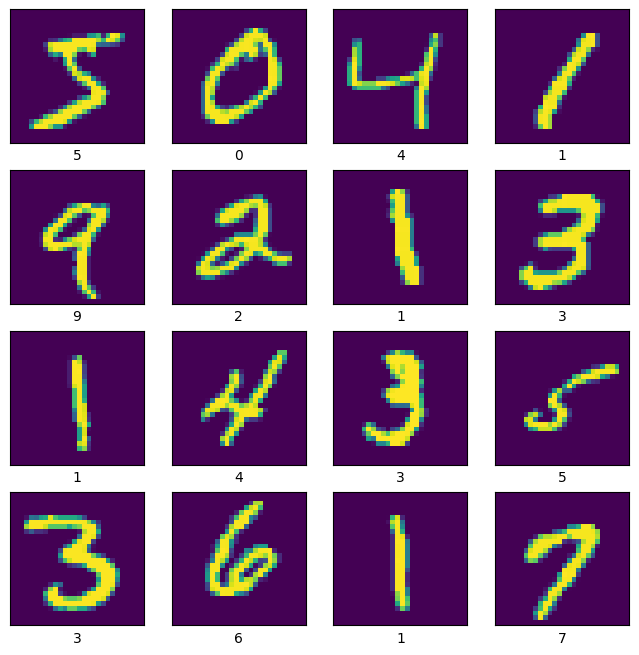

In [2]:
# First on MNIST data
(xtrain, ytrain), (xtest, ytest) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
xtrain, xtest = xtrain / 255.0, xtest / 255.0

#%%
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i])
    plt.xlabel(str(ytrain[i]))
plt.show()

In [4]:
xtrain = xtrain.reshape(np.shape(xtrain)[0], 784)
xtest = xtest.reshape(np.shape(xtest)[0], 784)
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

ytrain = ytrain.flatten()
ytest = ytest.flatten()

In [5]:
#%% RF

rf = RandomForestClassifier(n_jobs=-1, verbose=1)
rf.fit(xtrain, ytrain)
train_score = rf.score(xtrain, ytrain)
test_score = rf.score(xtest, ytest)

print("RF Train acc: ", train_score)
print("RF Test acc: ", test_score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s


RF Train acc:  1.0
RF Test acc:  0.9687


[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.1s finished


In [6]:
#%% Xgboost
xgb = xgb.XGBClassifier(objective='multi:softmax',tree_method='gpu_hist', n_jobs=-1)
  

xgb.fit(xtrain, ytrain, verbose=True)
    
print(xgb)

train_score = xgb.score(xtrain, ytrain)
test_score = xgb.score(xtest, ytest)

print("XGB Train acc: ", train_score)
print("XGB Test acc: ", test_score)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)
XGB Train acc:  1.0
XGB Test acc:  0.978


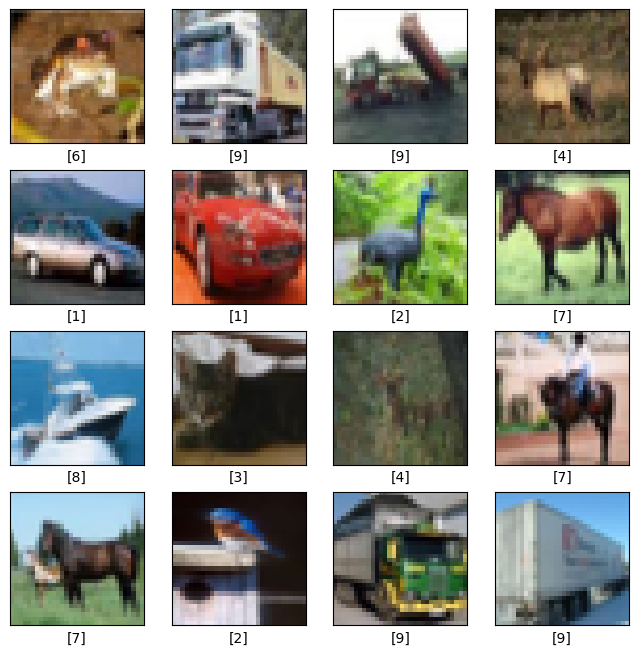

In [8]:
# Now for cifar-10 dataset
(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
xtrain, xtest = xtrain / 255.0, xtest / 255.0

#%%
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i])
    plt.xlabel(str(ytrain[i]))
plt.show()

xtrain = xtrain.reshape(np.shape(xtrain)[0], 3072)
xtest = xtest.reshape(np.shape(xtest)[0], 3072)
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

ytrain = ytrain.flatten()
ytest = ytest.flatten()

In [9]:
#%% RF

rf = RandomForestClassifier(n_jobs=-1, verbose=1)
rf.fit(xtrain, ytrain)
train_score = rf.score(xtrain, ytrain)
test_score = rf.score(xtest, ytest)

print("RF Train acc: ", train_score)
print("RF Test acc: ", test_score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.6s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s


RF Train acc:  1.0
RF Test acc:  0.469


[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.1s finished


In [10]:
#%% Xgboost

xgb = xgb.XGBClassifier(objective='multi:softmax',tree_method='gpu_hist', n_jobs=-1)
  

xgb.fit(xtrain, ytrain, verbose=True)
    
print(xgb)

train_score = xgb.score(xtrain, ytrain)
test_score = xgb.score(xtest, ytest)

print("XGB Train acc: ", train_score)
print("XGB Test acc: ", test_score)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)
XGB Train acc:  0.98466
XGB Test acc:  0.5368
